## Setup environment

In [1]:
import os
import glob
import random
import json
import warnings
from collections import defaultdict
from monai.transforms import (EnsureChannelFirstd, Compose, LoadImaged, Spacingd, Resized)
from monai.data import CacheDataset, DataLoader
import numpy as np
import random
from collections import defaultdict
from monai.data import Dataset
from monai.utils import first, set_determinism
import matplotlib.pyplot as plt
import torch
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import matplotlib.pyplot as plt
from monai.transforms import Compose, LoadImaged, EnsureChannelFirstd, Spacingd, SpatialPadd


In [2]:
config_file = 'config.json'

with open(config_file, 'r') as f:
    config = json.load(f)

ga_data_dir = config["ga_data_dir"]
fdg_data_dir = config["fdg_data_dir"]
log_dir = config["log_dir"]
ga_output_dir = config["ga_output_dir"]
artifact_dir = config["artifacts"]
artifact_output = config ["artifact_output"]
fdg_output_dir = config['fdg_output_dir']


## Set dataset path

In [3]:

from data_preparation import ExternalRadioSetHandling

data_handler = ExternalRadioSetHandling(data_dir=fdg_data_dir, test_ratio=1)
train_files, val_files, test_files = data_handler.get_split_data()

print(f"Test data length: {len(test_files)}")
print(f"Validation data length: {len(val_files)}")
print(f"Train data length: {len(train_files)}")

# To access 'image' keys, iterate through the list
image_files = [file_info['image'] for file_info in test_files]
target_files = [file_info['target'] for file_info in test_files]
print(len(image_files))

Test data length: 98
Validation data length: 0
Train data length: 0
98


In [4]:
test_name = [(os.path.splitext(os.path.splitext(os.path.basename(file_info['image']))[0])[0], 
              os.path.splitext(os.path.splitext(os.path.basename(file_info['target']))[0])[0]) 
             for file_info in test_files]
test_name

[('006009_dataset_07_A', '006009_dataset_07_A'),
 ('005081_dataset_06_A_nac_6', '005081_dataset_06_A_nac_6'),
 ('006056_dataset_07_A', '006056_dataset_07_A'),
 ('005035_dataset_06_A', '005035_dataset_06_A'),
 ('006036_dataset_07_A', '006036_dataset_07_A'),
 ('006038_dataset_07_A', '006038_dataset_07_A'),
 ('006011_dataset_07_A', '006011_dataset_07_A'),
 ('005085_dataset_06_A_nac_6', '005085_dataset_06_A_nac_6'),
 ('005019_dataset_06_A', '005019_dataset_06_A'),
 ('005001_dataset_06_A', '005001_dataset_06_A'),
 ('005065_dataset_06_A', '005065_dataset_06_A'),
 ('006025_dataset_07_A', '006025_dataset_07_A'),
 ('005096_dataset_06_A_nac_6', '005096_dataset_06_A_nac_6'),
 ('005049_dataset_06_A_nac_3', '005049_dataset_06_A_nac_3'),
 ('005091_dataset_06_A_nac_6', '005091_dataset_06_A_nac_6'),
 ('005008_dataset_06_A', '005008_dataset_06_A'),
 ('005041_dataset_06_A_nac_3', '005041_dataset_06_A_nac_3'),
 ('005021_dataset_06_A', '005021_dataset_06_A'),
 ('006048_dataset_07_A', '006048_dataset_07_A'

No DL image found for 006009_dataset_07_A
No DL image found for 005081_dataset_06_A_nac_6
No DL image found for 006056_dataset_07_A
No DL image found for 005035_dataset_06_A
No DL image found for 006036_dataset_07_A
No DL image found for 006038_dataset_07_A
No DL image found for 006011_dataset_07_A
No DL image found for 005085_dataset_06_A_nac_6
No DL image found for 005019_dataset_06_A
No DL image found for 005001_dataset_06_A
No DL image found for 005065_dataset_06_A
No DL image found for 006025_dataset_07_A
No DL image found for 005096_dataset_06_A_nac_6
No DL image found for 005049_dataset_06_A_nac_3
No DL image found for 005091_dataset_06_A_nac_6
No DL image found for 005008_dataset_06_A
No DL image found for 005041_dataset_06_A_nac_3
No DL image found for 005021_dataset_06_A
No DL image found for 006048_dataset_07_A
No DL image found for 006023_dataset_07_A
No DL image found for 005098_dataset_06_A_nac_6
No DL image found for 006020_dataset_07_A
No DL image found for 006018_datas

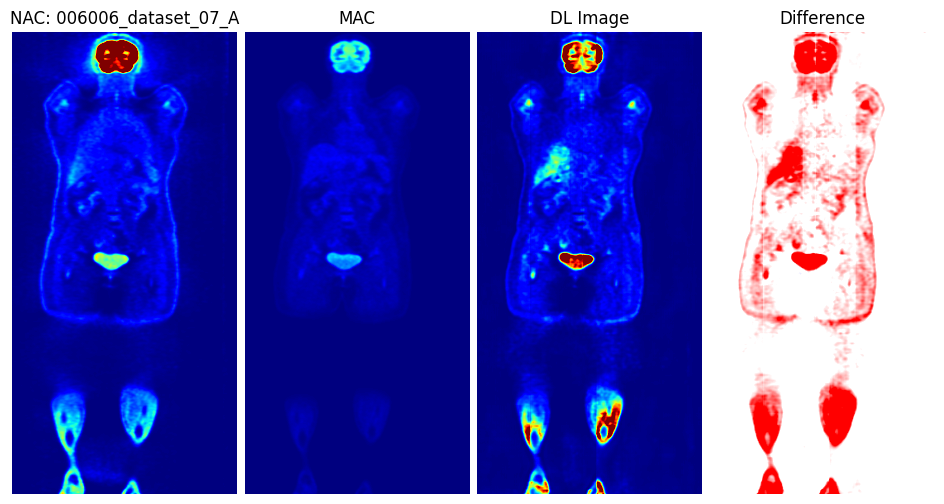

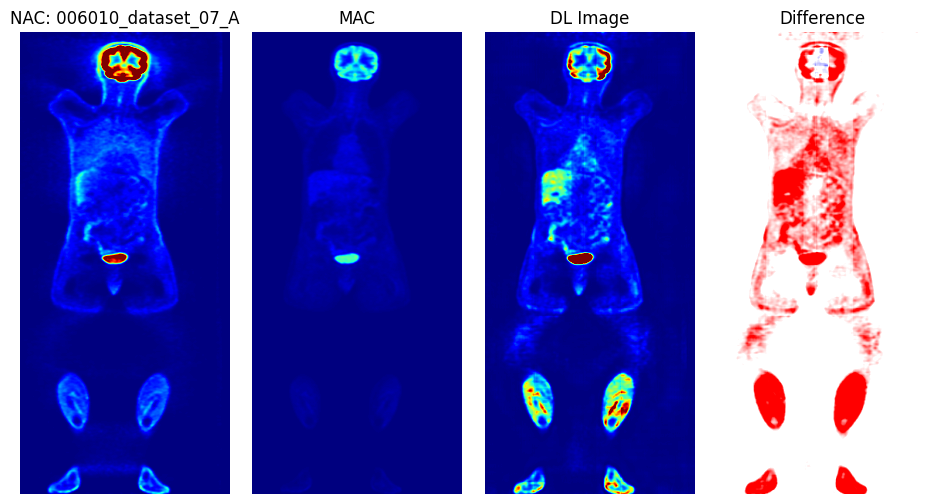

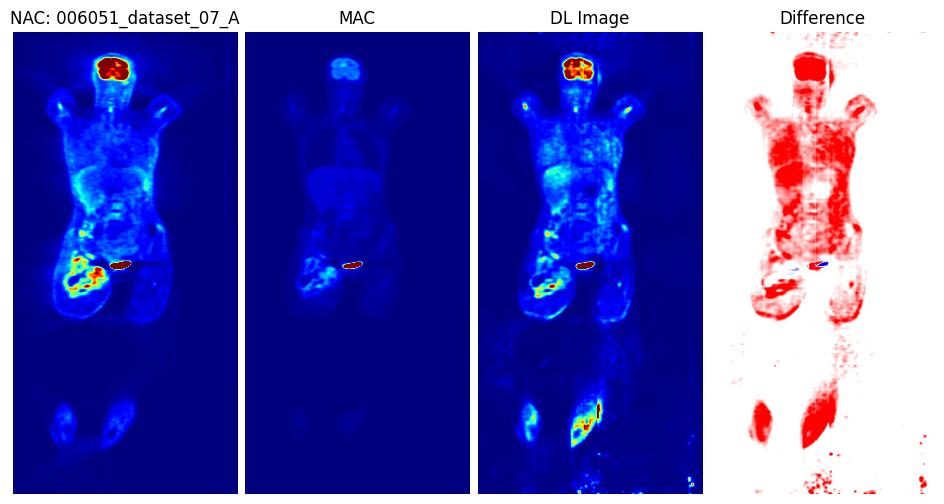

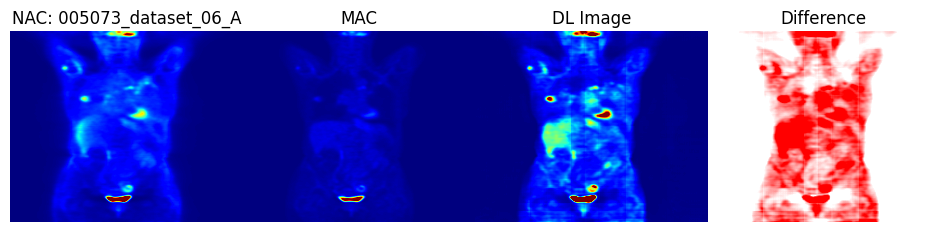

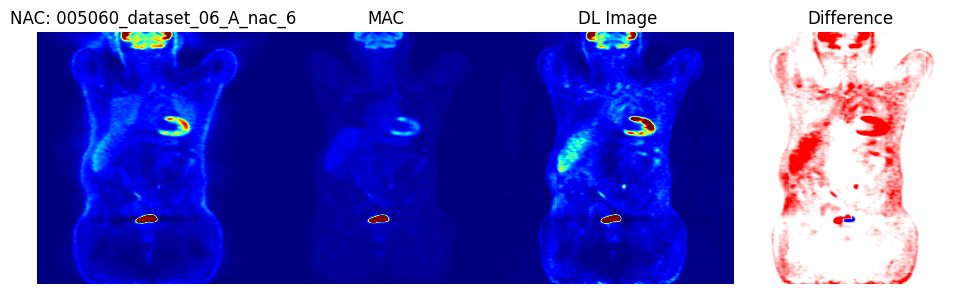

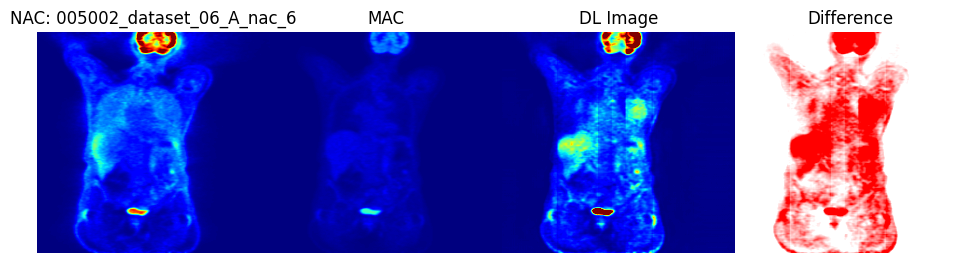

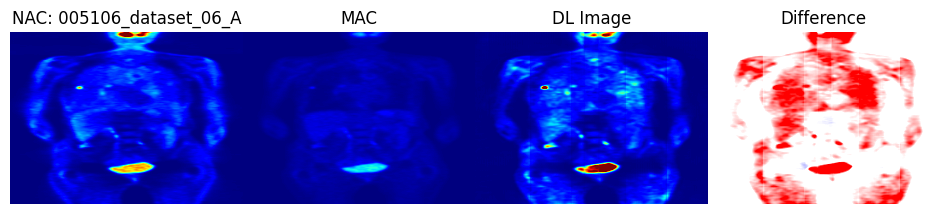

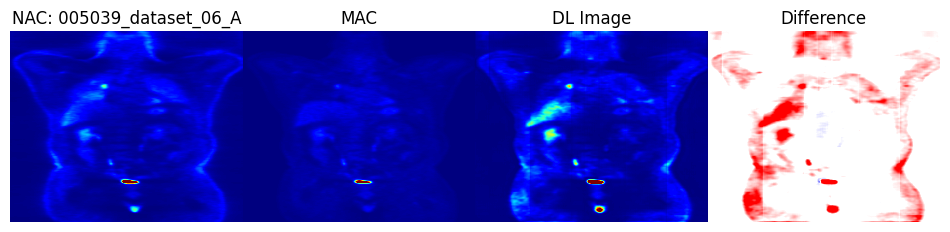

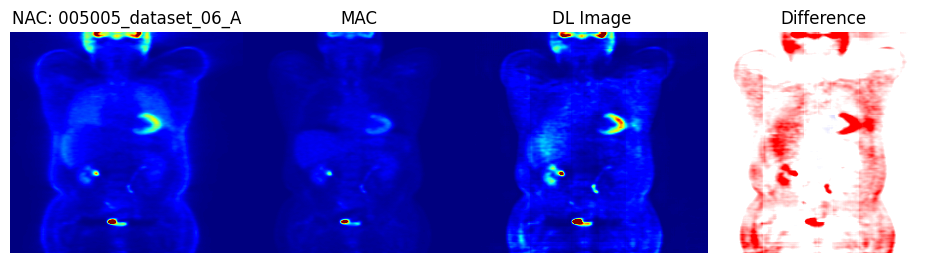

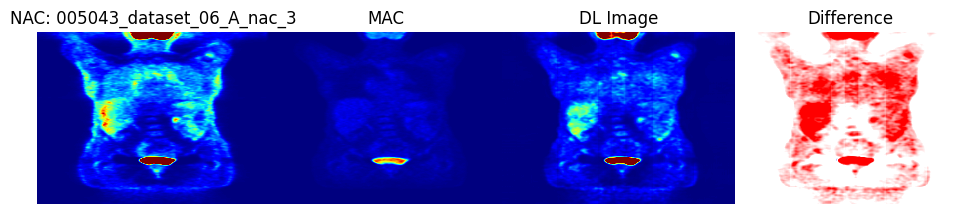

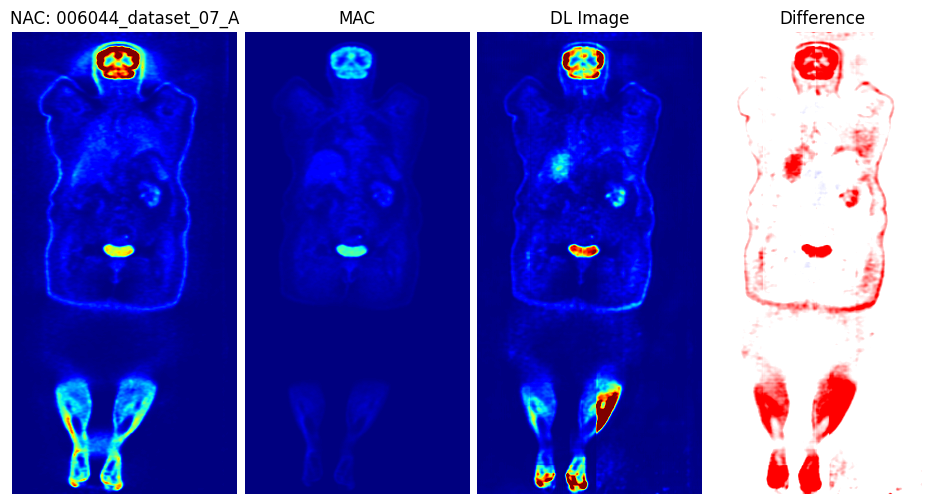

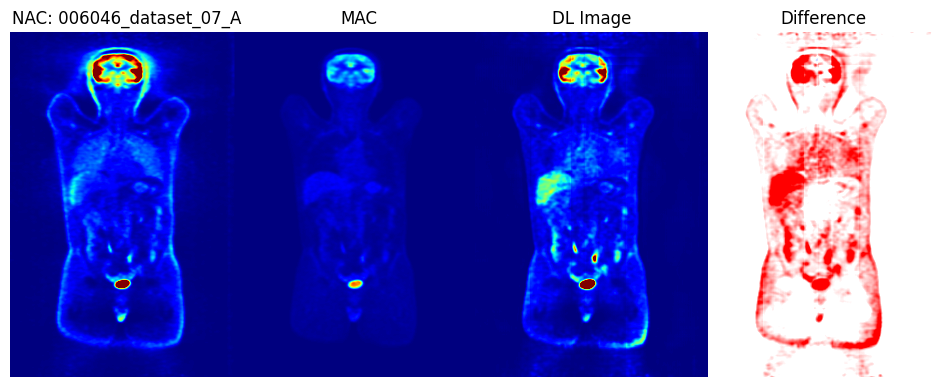

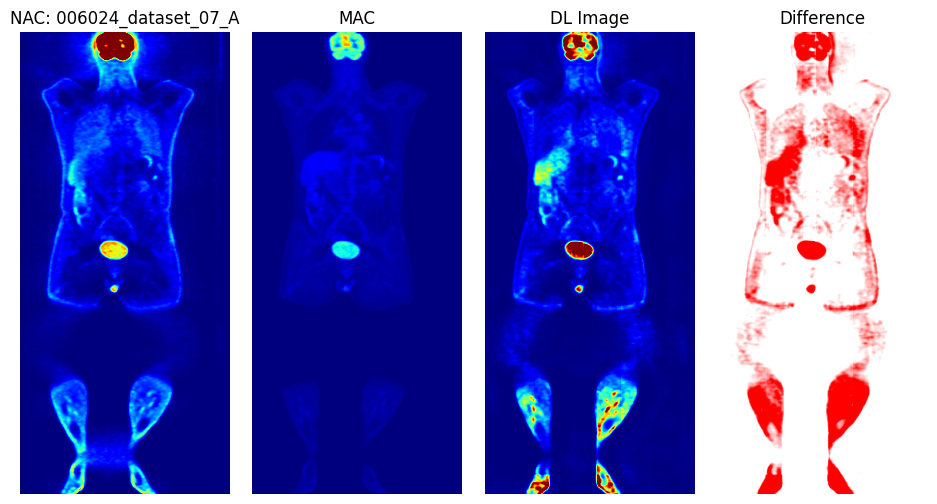

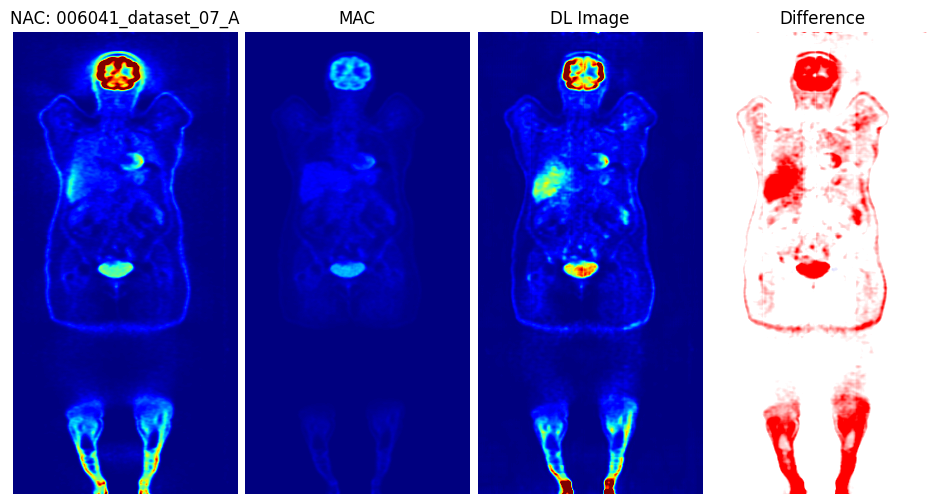

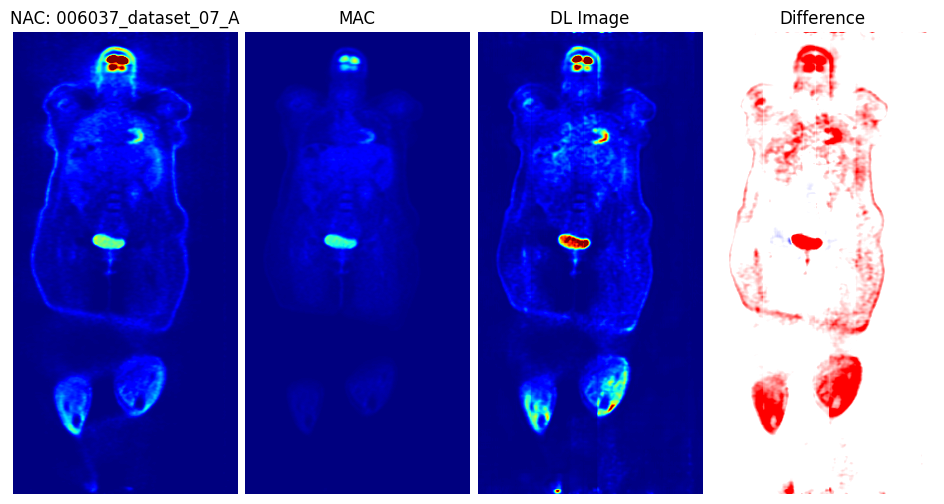

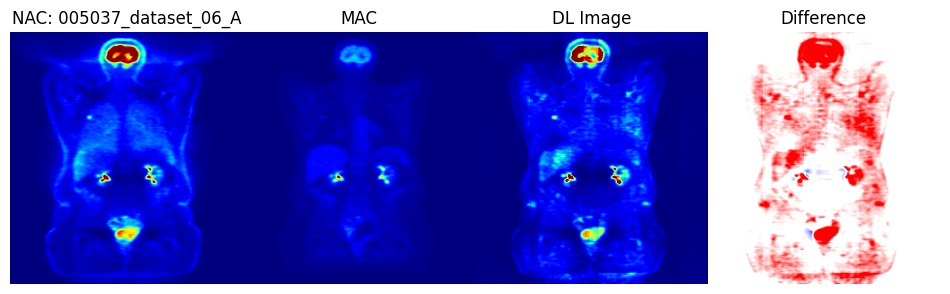

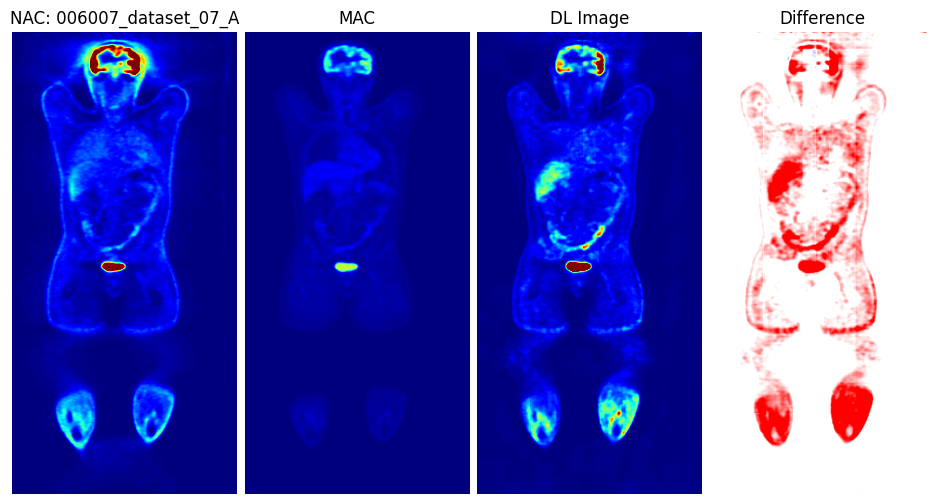

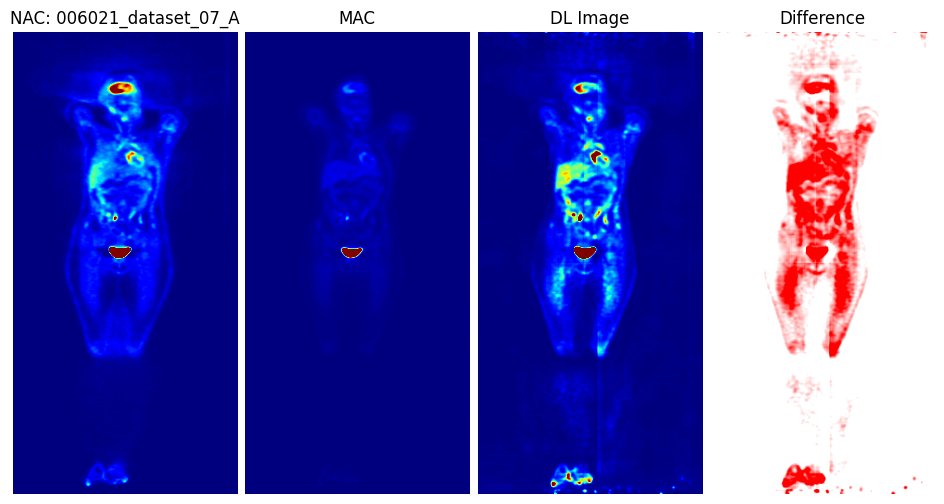

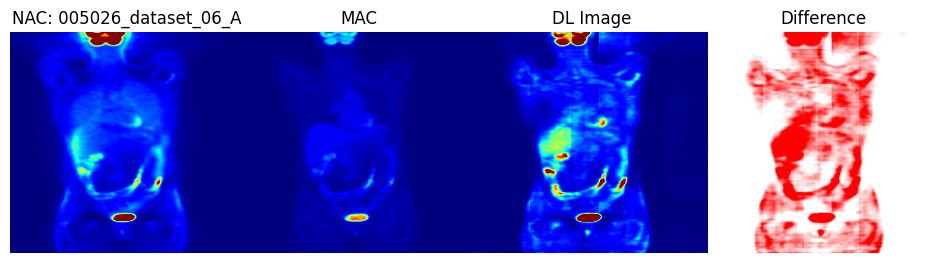

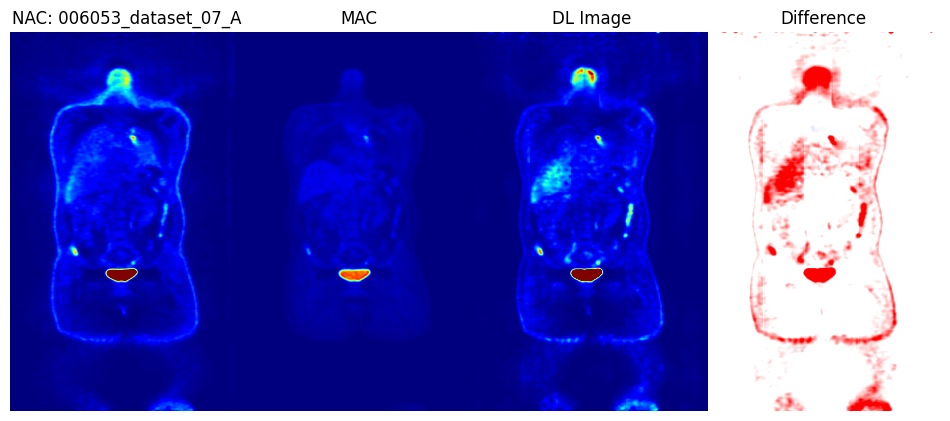

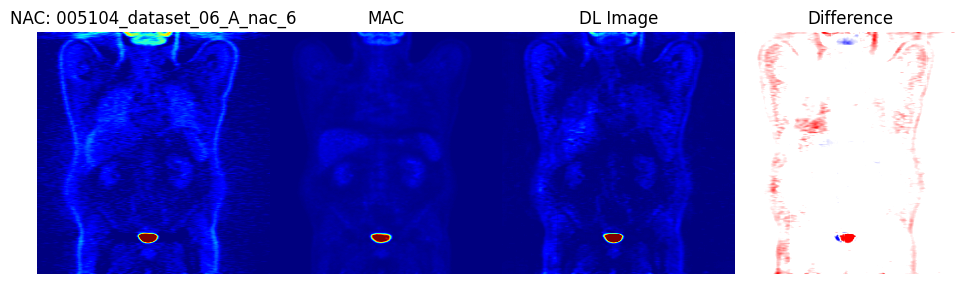

In [5]:
from utils import find_dl_image_path, normalize_data
from vis import display_patient_coronal, display_patient_transverse


hint = "dl_final_3_29"
hint = 'gamodel_3_18_onfdg'
i = 1
for file_info, name_pair in zip(test_files, test_name):
    image_path = file_info['image']
    target_path = file_info['target']
    patient_folder_name_image, _ = name_pair

    dl_image_path = find_dl_image_path(fdg_output_dir, patient_folder_name_image, hint)
    if dl_image_path is None:
        print(f"No DL image found for {patient_folder_name_image}")
        continue

    # image = normalize_data(nib.load(image_path).get_fdata())
    # target = normalize_data(nib.load(target_path).get_fdata())
    # dl_image = normalize_data(nib.load(dl_image_path).get_fdata())

    image = nib.load(image_path).get_fdata()
    target = nib.load(target_path).get_fdata()
    dl_image = nib.load(dl_image_path).get_fdata()
    difference_image = target - dl_image

    difference_image = np.clip(difference_image, -1, 1)

    n = 117
    # n = 101
    display_patient_coronal(patient_folder_name_image, image, target, dl_image, difference_image, n, cmp ="jet")
    # i +=1
    # if i == 4:
    #     break


    # n = 198

    # display_patient_transverse(patient_folder_name_image, image, target, dl_image, difference_image, n)
    # # i +=1
    # # if i == 4:
    # #     break



In [6]:
# import nibabel as nib
# import matplotlib.pyplot as plt
# import numpy as np
# import os
# import glob
# from matplotlib.colors import LinearSegmentedColormap
# import numpy as np
# import matplotlib.pyplot as plt

# def apply_window(image, window_level, window_width):
#     """
#     Apply window level and width to an image.

#     Parameters:
#     - image: The input image as a NumPy array.
#     - window_level (WL): The center of the range of interest.
#     - window_width (WW): The width of the range of interest.

#     Returns:
#     - The windowed image.
#     """
#     lower_bound = window_level - window_width / 2
#     upper_bound = window_level + window_width / 2
#     windowed_image = np.clip(image, lower_bound, upper_bound)
#     windowed_image = (windowed_image - lower_bound) / window_width
#     return windowed_image

# window_level = 0  # Example values
# window_width = 1  # Example values

# hint = "dl3_18"

# # Function to find the DL image path for a given patient folder name
# def find_dl_image_path(patient_folder_name):
#     # Construct a glob pattern to search for DL images with the matching patient folder name
#     search_pattern = os.path.join(artifact_output, "**", f"{patient_folder_name}*{hint}.nii.gz")
#     found_paths = glob.glob(search_pattern, recursive=True)
#     if found_paths:
#         return found_paths[0]  # Return the first match
#     else:
#         return None  # No match found

# def normalize_data(data):
#     return (data - np.min(data)) / (np.max(data) - np.min(data))
# cmap = LinearSegmentedColormap.from_list(
#     'bwr', 
#     # ['purple', 'purple','darkviolet','white','white', 'lime', 'limegreen','limegreen']
#     ['purple','white','limegreen']
#     # ['purple', 'purple','purple','white','white', 'limegreen', 'limegreen','limegreen']
#     #['red', 'red','orangered','white','white', 'royalblue', 'blue','blue']
#     #['red', 'red','red','white','white', 'blue', 'blue','blue']
#     # ['red', 'red','red','tomato','white','white' , 'dodgerblue', 'blue', 'blue', 'blue']
# )
# # Loop over each file pair, find the matching DL image, and plot them
# for file_info, name_pair in zip(test_files, test_name):
#     image_path = file_info['image']
#     target_path = file_info['target']
#     patient_folder_name_image, _ = name_pair

#     dl_image_path = find_dl_image_path(patient_folder_name_image)
#     if dl_image_path is None:
#         print(f"No DL image found for {patient_folder_name_image}")
#         continue

#     # Load and normalize images
#     image = normalize_data(nib.load(image_path).get_fdata())
#     target = normalize_data(nib.load(target_path).get_fdata())
#     dl_image = normalize_data(nib.load(dl_image_path).get_fdata())
#     windowed_image = apply_window(image, window_level, window_width)
#     # Calculate the difference image and normalize to range -1 to 1
#     difference_image = target - dl_image
#     # difference_image = np.clip(difference_image, -1, 1)  # Ensure the difference is within -1 to 1

#     # difference_image = 2 * (difference_image - np.min(difference_image)) / (np.max(difference_image) - np.min(difference_image)) - 1

#     # image = nib.load(image_path).get_fdata()
#     # target = nib.load(target_path).get_fdata()
#     # dl_image = nib.load(dl_image_path).get_fdata()
#     # difference_image = target - dl_image
#     # # difference_image = np.clip(difference_image, -1, 1)  # Ensure the difference is within -1 to 1
#     n = 94

#     fig, axs = plt.subplots(1, 4, figsize=(20, 6))

#     plt.subplot(1, 4, 1)
#     plt.title(f"Input: {patient_folder_name_image}")
#     input_slice = np.rot90(image[:, n, :])
#     plt.imshow(input_slice, cmap="gist_yarg", vmin=0, vmax=0.1)
#     plt.axis('off')

#     plt.subplot(1, 4, 2)
#     plt.title("Target")
#     input_slice = np.rot90(target[:, n, :])
#     plt.imshow(input_slice, cmap="gist_yarg", vmin=0, vmax=0.1)
#     plt.axis('off')

#     plt.subplot(1, 4, 3)
#     plt.title("DL Image")
#     input_slice = np.rot90(dl_image[:, n, :])
#     plt.imshow(input_slice, cmap="gist_yarg", vmin=0, vmax=0.1)
#     plt.axis('off')

#     ax = plt.subplot(1, 4, 4)
#     plt.subplot(1, 4, 4)
#     plt.title("Difference")
#     # Using a diverging colormap to highlight differences
#     difference_display = plt.imshow(np.rot90(difference_image[:, n, :]), cmap=cmap, vmin=-0.1, vmax=0.1) # vmin=-np.max(np.abs(difference_image)), vmax=np.max(np.abs(difference_image)))
#     plt.axis('off')
#     fig.colorbar(difference_display, ax=axs[3])

#     plt.tight_layout()
#     plt.show()
#     # break
